In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [453]:
df=pd.read_csv("project2data.csv")
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [454]:
df.head(6)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12


# Data cleaning

In [455]:
df.shape

(913000, 4)

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [457]:
#converting date column(object to datetime)
df['date']=pd.to_datetime(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [458]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [459]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [460]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [461]:
df_1=df.set_index('date')
df_1.head()
#df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [462]:
#df_sales=df.drop(['store','item'],axis=1)

# EDA

In [463]:
###Splitting the date intoday,month and year
df_1['day']=df_1.index.day
df_1['month']=df_1.index.month
df_1['year']=df_1.index.year
print(df)

             date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]


In [464]:
### Groupby of store and item column
df_1.groupby(['store','item']).size()

store  item
1      1       1826
       2       1826
       3       1826
       4       1826
       5       1826
               ... 
10     46      1826
       47      1826
       48      1826
       49      1826
       50      1826
Length: 500, dtype: int64

In [465]:
df_1=df_1[(df_1.store==1)&(df_1.item==1)]
df_1

,store,item,sales,day,month,year
date,,,,,,
2013-01-01,1,1,13,1,1,2013
2013-01-02,1,1,11,2,1,2013
2013-01-03,1,1,14,3,1,2013
2013-01-04,1,1,13,4,1,2013
2013-01-05,1,1,10,5,1,2013
...,...,...,...,...,...,...
2017-12-27,1,1,14,27,12,2017
2017-12-28,1,1,19,28,12,2017
2017-12-29,1,1,15,29,12,2017


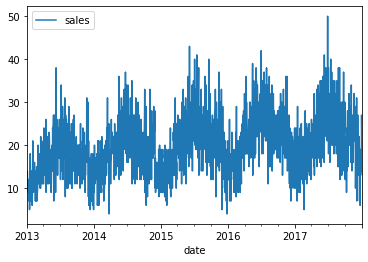

In [466]:
### Random plot of store=1 and item=1
df_1[(df_1.store==1) & (df_1.item==1)]['sales'].plot().legend()

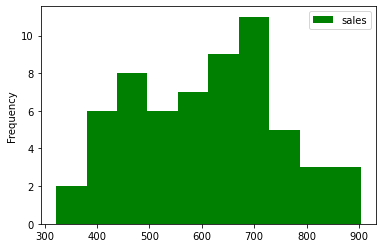

In [467]:
### Sales Plot on Monthly basis
df_1['sales'].resample('M').sum().plot(kind='hist',color='green').legend()

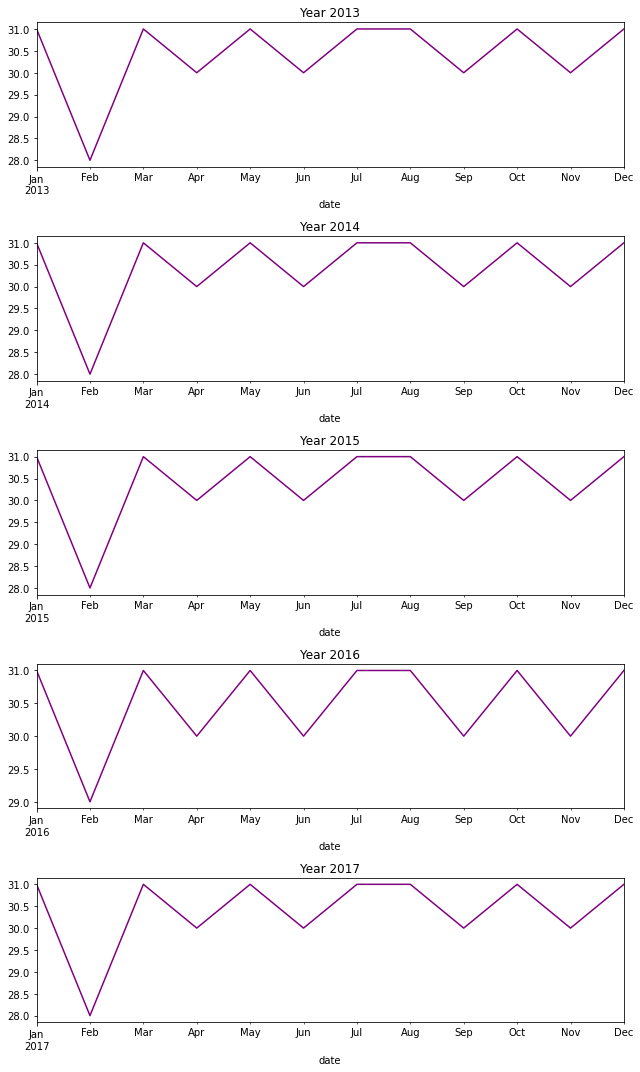

In [468]:
##### Plotting of items on Monthly basis for 5 years  

fig, axs = plt.subplots(5, 1, figsize=(9,15))

df_1["2013-01-01":"2013-12-31"].item.resample('M').sum().plot(ax=axs[0],color='purple')
axs[0].set_title('Year 2013')
df_1["2014-01-01":"2014-12-31"].item.resample('M').sum().plot(ax=axs[1],color='purple')
axs[1].set_title('Year 2014')
df_1["2015-01-01":"2015-12-31"].item.resample('M').sum().plot(ax=axs[2],color='purple')
axs[2].set_title('Year 2015')
df_1["2016-01-01":"2016-12-31"].item.resample('M').sum().plot(ax=axs[3],color='purple')
axs[3].set_title('Year 2016')
df_1["2017-01-01":"2017-12-31"].item.resample('M').sum().plot(ax=axs[4],color='purple')
axs[4].set_title('Year 2017')

plt.tight_layout()
plt.show()

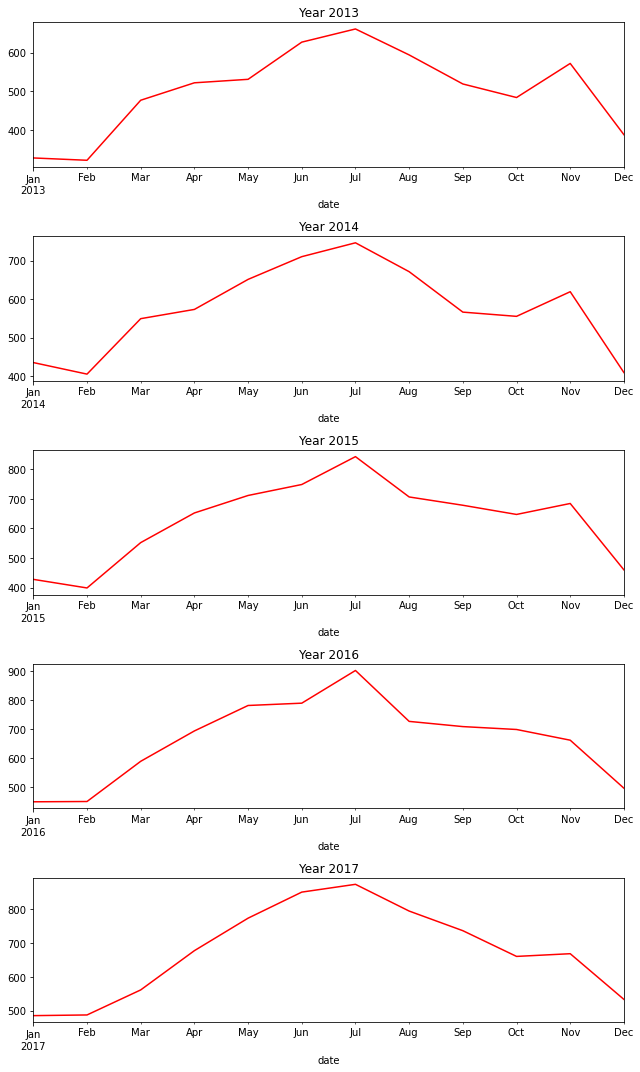

In [469]:
######  Plotting of sales on monthly basis for 5 years 

fig, axs = plt.subplots(5, 1, figsize=(9,15))

df_1["2013-01-01":"2013-12-31"].sales.resample('M').sum().plot(ax=axs[0],color='red')
axs[0].set_title('Year 2013')
df_1["2014-01-01":"2014-12-31"].sales.resample('M').sum().plot(ax=axs[1],color='red')
axs[1].set_title('Year 2014')
df_1["2015-01-01":"2015-12-31"].sales.resample('M').sum().plot(ax=axs[2],color='red')
axs[2].set_title('Year 2015')
df_1["2016-01-01":"2016-12-31"].sales.resample('M').sum().plot(ax=axs[3],color='red')
axs[3].set_title('Year 2016')
df_1["2017-01-01":"2017-12-31"].sales.resample('M').sum().plot(ax=axs[4],color='red')
axs[4].set_title('Year 2017')

plt.tight_layout()
plt.show()

In [470]:
df_1.head()

,store,item,sales,day,month,year
date,,,,,,
2013-01-01,1,1,13,1,1,2013
2013-01-02,1,1,11,2,1,2013
2013-01-03,1,1,14,3,1,2013
2013-01-04,1,1,13,4,1,2013
2013-01-05,1,1,10,5,1,2013


<AxesSubplot:xlabel='year', ylabel='sales'>

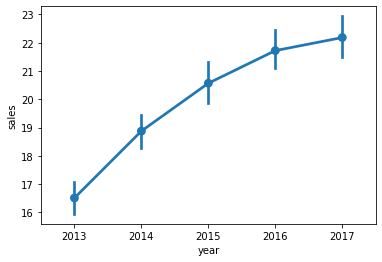

In [471]:
sns.pointplot(x=df_1['year'],y=df_1['sales'])

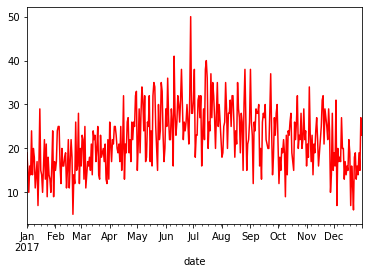

In [472]:
# plotting of sales of every year
df_1['Year'] = df_1.index.year
df_1['Month'] = df_1.index.month
df_1.sample(3)
ax=df_1.loc['2017','sales'].plot(color="red")

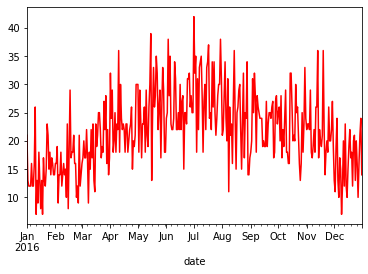

In [473]:
df_1['Year'] = df_1.index.year
df_1['Month'] = df_1.index.month
df_1.sample(5)
ax=df_1.loc['2016','sales'].plot(color="red")

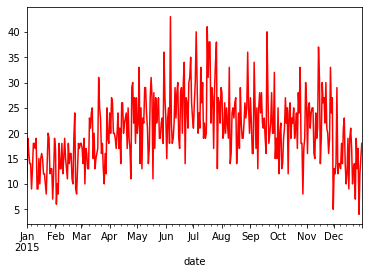

In [474]:
df_1['Year'] = df_1.index.year
df_1['Month'] = df_1.index.month
df_1.sample(3)
ax=df_1.loc['2015','sales'].plot(color="red")

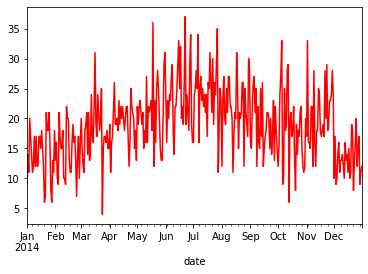

In [475]:
df_1['Year']=df_1.index.year
df_1['Month']=df_1.index.month
df_1.sample(3)
ax=df_1.loc['2014','sales'].plot(color="red")

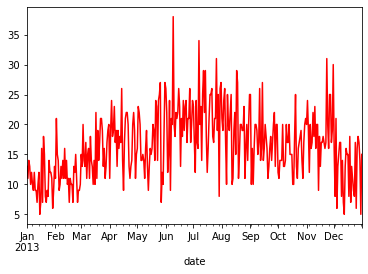

In [476]:
df_1['Year'] = df_1.index.year
df_1['Month'] = df_1.index.month
df_1.sample(3)
ax=df_1.loc['2013','sales'].plot(color="red")

In [477]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [478]:
data = pd.read_csv('project2data.csv')
data.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [479]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [480]:
data = data.drop(['store','item'], axis=1)

In [481]:
data['date'] = pd.to_datetime(data['date'])

In [482]:
data['date'] = data['date'].dt.to_period('M')
monthly_data = data.groupby('date').sum().reset_index()

In [483]:
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()
monthly_data.head(10)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


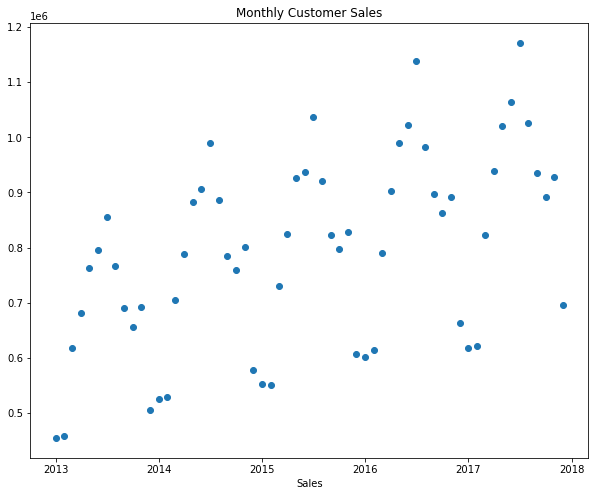

In [484]:
plt.figure(figsize=(10,8))
plt.scatter(monthly_data['date'], monthly_data['sales'])
plt.xlabel('Date')
plt.xlabel('Sales')
plt.title("Monthly Customer Sales")
plt.show()

In [485]:
monthly_data['sales_diff'] = monthly_data['sales'].diff()
monthly_data = monthly_data.dropna()
monthly_data.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


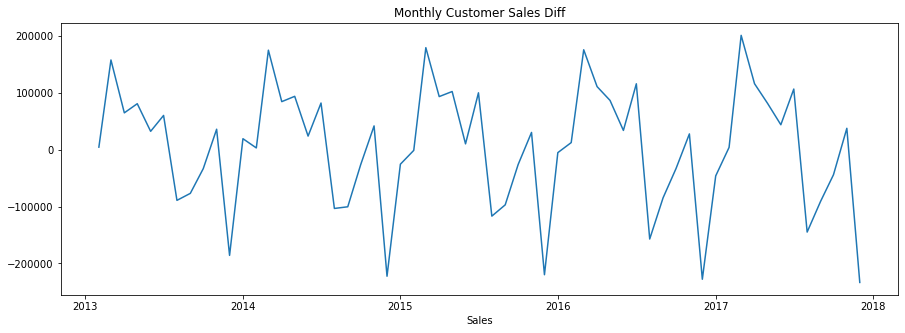

In [486]:
plt.figure(figsize=(15,5))
plt.plot(monthly_data['date'], monthly_data['sales_diff'])
plt.xlabel('Date')
plt.xlabel('Sales')
plt.title("Monthly Customer Sales Diff")
plt.show()

In [487]:
sup_data = monthly_data.drop(['date','sales'], axis=1)

In [488]:
for i in range(1,13):
    col_name = 'month_' + str(i)
    sup_data[col_name] = sup_data['sales_diff'].shift(i)
sup_data = sup_data.dropna().reset_index(drop=True)
sup_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


In [489]:
#### Test and Train

train_data = sup_data[:-12]
test_data = sup_data[-12:]
print('Train Data Shape:', train_data.shape)
print('Test Data Shape:', test_data.shape)

Train Data Shape: (35, 13)
Test Data Shape: (12, 13)


In [490]:
##### Scaling 

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [491]:
##### Spliting

X_train, y_train = train_data[:,1:], train_data[:,0:1]
X_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (35, 12)
y_train Shape: (35,)
X_test Shape: (12, 12)
y_test Shape: (12,)


In [492]:
sales_dates = monthly_data['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [493]:
sales_data = monthly_sales['sales'][-13:].to_list()

# Linear Regression

In [494]:
###

linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
linreg_pred = linreg_model.predict(X_test)

In [495]:
linreg_pred = linreg_pred.reshape(-1,1)
linreg_pred_test_set = np.concatenate([linreg_pred,X_test], axis=1)
linreg_pred_test_set = scaler.inverse_transform(linreg_pred_test_set)

In [496]:
result_list = []
for index in range(0, len(linreg_pred_test_set)):
    result_list.append(linreg_pred_test_set[index][0] + act_sales[index])
linreg_pred_series = pd.Series(result_list,name='linreg_pred')
predict_df = predict_df.merge(linreg_pred_series, left_index=True, right_index=True)

In [497]:
####### Evaluation_Metric

linreg_rmse = np.sqrt(mean_squared_error(predict_df['linreg_pred'], monthly_sales['sales'][-12:]))
linreg_mae = mean_absolute_error(predict_df['linreg_pred'], monthly_sales['sales'][-12:])
linreg_r2 = r2_score(predict_df['linreg_pred'], monthly_sales['sales'][-12:])
print('Linear Regression RMSE: ', linreg_rmse)
print('Linear Regression MAE: ', linreg_mae)
print('Linear Regression R2 Score: ', linreg_r2)

Linear Regression RMSE:  16221.272385416854
Linear Regression MAE:  12433.184266490736
Linear Regression R2 Score:  0.9906152516380969


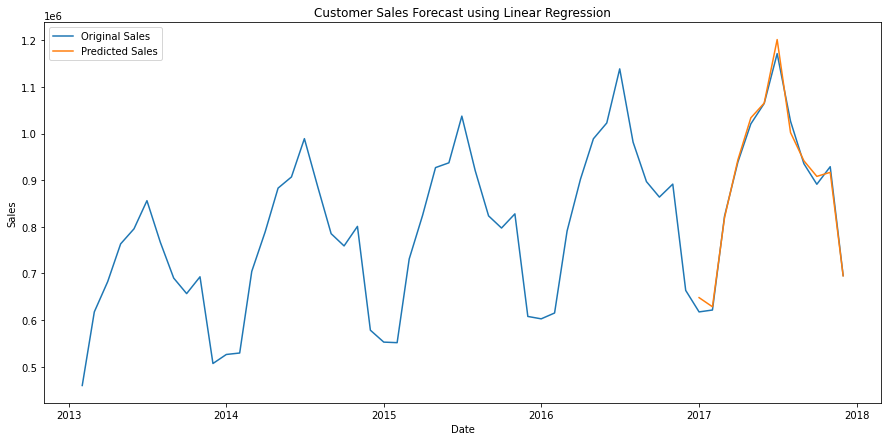

In [498]:
########## Plotting the Sales

plt.figure(figsize=(15,7))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['linreg_pred'])
plt.title("Customer Sales Forecast using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

# Random Forest

In [499]:
#### fit

rf_model = RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [500]:
rf_pred = rf_pred.reshape(-1,1)
rf_pred_test_set = np.concatenate([rf_pred,X_test], axis=1)
rf_pred_test_set = scaler.inverse_transform(rf_pred_test_set)

In [501]:
result_list = []
for index in range(0, len(rf_pred_test_set)):
    result_list.append(rf_pred_test_set[index][0] + act_sales[index])
rf_pred_series = pd.Series(result_list, name='rf_pred')
predict_df = predict_df.merge(rf_pred_series, left_index=True, right_index=True)

In [502]:
######## Evaluation_Metric

rf_rmse = np.sqrt(mean_squared_error(predict_df['rf_pred'], monthly_sales['sales'][-12:]))
rf_mae = mean_absolute_error(predict_df['rf_pred'], monthly_sales['sales'][-12:])
rf_r2 = r2_score(predict_df['rf_pred'], monthly_sales['sales'][-12:])
print('Random Forest RMSE: ', rf_rmse)
print('Random Forest MAE: ', rf_mae)
print('Random Forest R2 Score: ', rf_r2)

Random Forest RMSE:  18080.311026790543
Random Forest MAE:  15504.76000000003
Random Forest R2 Score:  0.9875434121132695


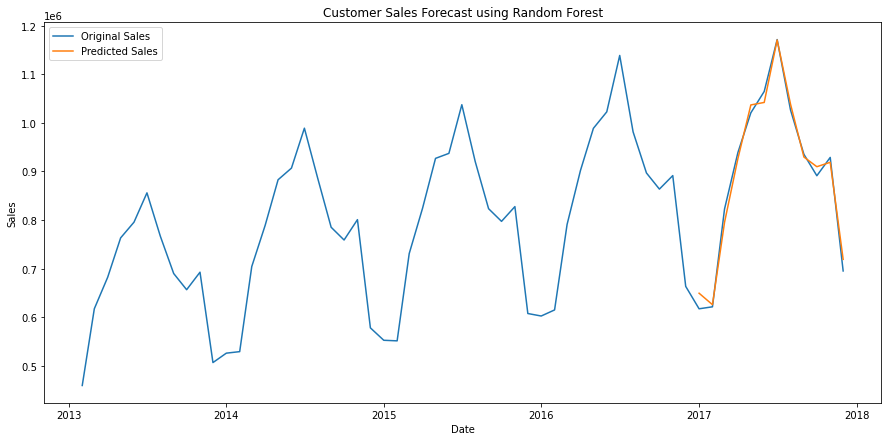

In [503]:
####### Plotting of Sales

plt.figure(figsize=(15,7))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['rf_pred'])
plt.title("Customer Sales Forecast using Random Forest")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

# XGBooster Regressor

In [504]:
######  Fit & Train

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.2, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [505]:
xgb_pred = xgb_pred.reshape(-1,1)
xgb_pred_test_set = np.concatenate([xgb_pred,X_test], axis=1)
xgb_pred_test_set = scaler.inverse_transform(xgb_pred_test_set)

In [506]:
result_list = []
for index in range(0, len(xgb_pred_test_set)):
    result_list.append(xgb_pred_test_set[index][0] + act_sales[index])
xgb_pred_series = pd.Series(result_list, name='xgb_pred')
predict_df = predict_df.merge(xgb_pred_series, left_index=True, right_index=True)

In [507]:
##############Evaluation_Metric

xgb_rmse = np.sqrt(mean_squared_error(predict_df['xgb_pred'], monthly_sales['sales'][-12:]))
xgb_mae = mean_absolute_error(predict_df['xgb_pred'], monthly_sales['sales'][-12:])
xgb_r2 = r2_score(predict_df['xgb_pred'], monthly_sales['sales'][-12:])
print('XG Boost RMSE: ', xgb_rmse)
print('XG Boost MAE: ', xgb_mae)
print('XG Boost R2 Score: ', xgb_r2)

XG Boost RMSE:  15701.124706426719
XG Boost MAE:  13342.738751299059
XG Boost R2 Score:  0.9907513141349301


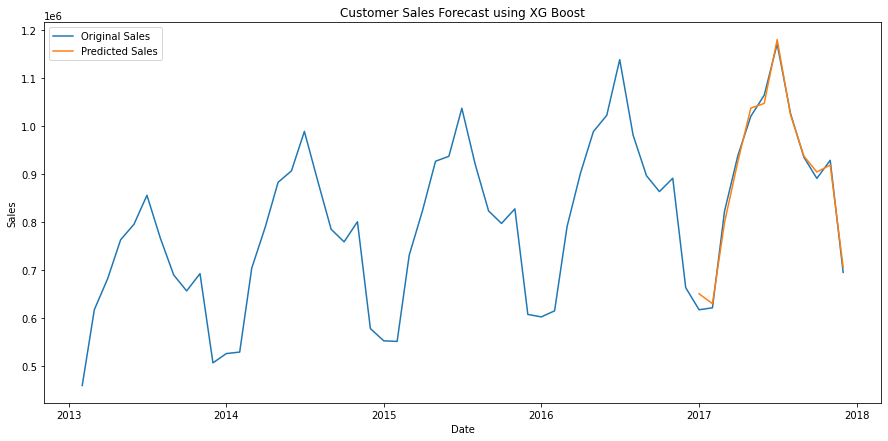

In [508]:
#######  Plotting of Sales

plt.figure(figsize=(15,7))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['xgb_pred'])
plt.title("Customer Sales Forecast using XG Boost")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

# Comparing All ML Algorithim

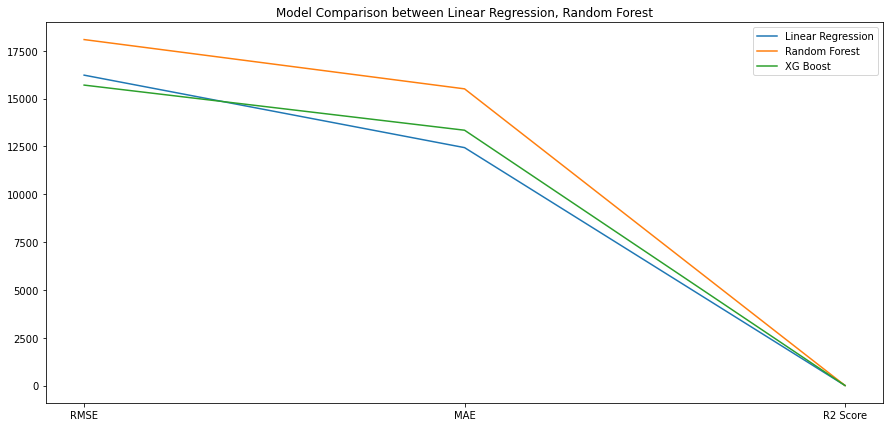

In [509]:
#######  Plotting the performance of three different models (Linear Regression, Random Forest, and XGBoost)


linreg_stats = [linreg_rmse, linreg_mae, linreg_r2]
rf_stats = [rf_rmse, rf_mae, rf_r2]
xgb_stats = [xgb_rmse, xgb_mae, xgb_r2]
plt.figure(figsize=(15,7))
plt.plot(linreg_stats)
plt.plot(rf_stats)
plt.plot(xgb_stats)
plt.title("Model Comparison between Linear Regression, Random Forest")
plt.xticks([0,1,2], labels=['RMSE','MAE','R2 Score'])
plt.legend(["Linear Regression", "Random Forest", "XG Boost"])
plt.show()